### Used Car(audi) data analysis for maching learning with python

#### References:
dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

#### import required libraries

In [17]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Reading the file

In [5]:
# read the audi.csv file
df = pd.read_csv("audi.csv")

# check the first 5 rows
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


#### finding count,mean,sum

In [6]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


#### data preprocessing 

In [30]:
df_agg = df_agg.sort_values(by='count', ascending=False)

# percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100
# two decimal points
df_agg = df_agg.round(2)

display(df_agg.head())

,count,mean,sum,percent_of_cars
model,,,,
A3,1929,17408.52,33.58,18.08
Q3,1417,22999.26,32.59,13.28
A4,1381,20255.45,27.97,12.95
A1,1347,14327.75,19.30,12.63
A5,882,23577.11,20.80,8.27


#### Based on model, transmission and fuelType

- top 5 selling car 
- average selling price of the top 5 selling car 
- total sale of the top 5 selling car 

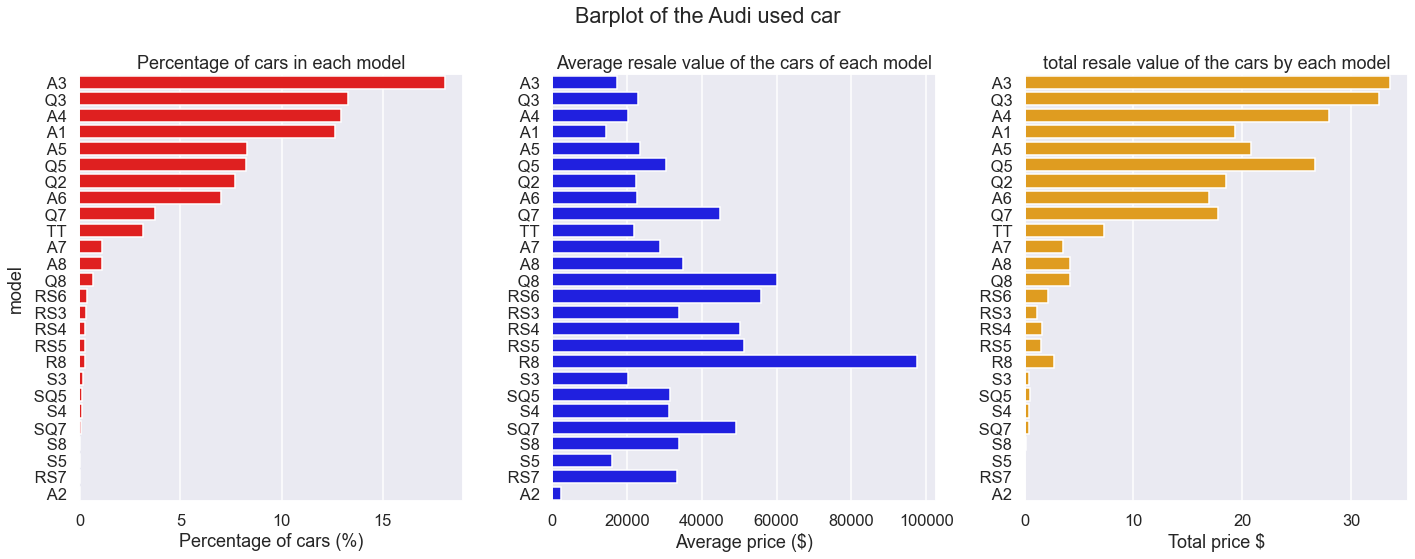

In [35]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='red')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price $")
plt.ylabel("")



plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()